In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
  raise SystemError("GPU not found")
print("GPU detected: {}".format(device_name))

GPU tespit edildi: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV



In [4]:
df = pd.read_csv('/content/drive/MyDrive/CBSD/PRFQ_df.csv', index_col=None, header=0)

In [5]:
df.head()

,PreM1,PreM2,PreM3,PreM4,PreM5,PreM6,C1,C2,C3,C4,C5,C6,IC1,IC2,IC3,IC4,IC5,IC6,CONDITION
0,2,1,4,1,2,1,4,3,4,3,4,4,3,2,2,2,3,4,H
1,1,1,5,1,1,1,1,1,1,1,5,1,5,5,5,3,5,5,H
2,1,1,1,1,1,1,3,3,3,3,5,3,5,4,5,5,5,5,H
3,4,2,5,1,1,1,4,1,1,3,3,1,3,3,4,1,3,1,H
4,1,1,3,1,1,1,3,3,2,5,5,3,4,3,3,3,4,5,H


In [6]:
df[:-1]

,PreM1,PreM2,PreM3,PreM4,PreM5,PreM6,C1,C2,C3,C4,C5,C6,IC1,IC2,IC3,IC4,IC5,IC6,CONDITION
0,2,1,4,1,2,1,4,3,4,3,4,4,3,2,2,2,3,4,H
1,1,1,5,1,1,1,1,1,1,1,5,1,5,5,5,3,5,5,H
2,1,1,1,1,1,1,3,3,3,3,5,3,5,4,5,5,5,5,H
3,4,2,5,1,1,1,4,1,1,3,3,1,3,3,4,1,3,1,H
4,1,1,3,1,1,1,3,3,2,5,5,3,4,3,3,3,4,5,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,5,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,D
673,1,1,1,5,1,1,5,5,1,5,1,5,5,5,1,5,5,5,D
674,4,1,1,1,1,2,4,5,5,2,5,5,4,3,4,4,5,5,D
675,1,1,1,1,1,1,5,5,5,4,5,5,5,4,5,5,5,5,D


In [7]:
df.shape

(678, 19)

In [8]:
df.isnull().sum().sum()
#We don't have any data is equal to 0. Therefore we do not need to get rid of this kind of data

0

In [10]:
df.groupby('CONDITION').mean()

,PreM1,PreM2,PreM3,PreM4,PreM5,PreM6,C1,C2,C3,C4,C5,C6,IC1,IC2,IC3,IC4,IC5,IC6
CONDITION,,,,,,,,,,,,,,,,,,
D,1.814159,1.398230,1.377581,1.374631,1.253687,1.274336,4.595870,4.439528,4.569322,3.958702,4.728614,4.575221,4.793510,4.675516,4.778761,4.825959,4.846608,4.480826
H,1.681416,1.168142,2.513274,1.162242,1.383481,1.955752,2.864307,2.460177,2.657817,2.486726,3.566372,2.648968,4.289086,3.935103,4.300885,3.932153,4.321534,4.203540


In [11]:
# y includes our labels and x includes our features
y = df.CONDITION                          
list = ['CONDITION']
X = df.drop(list,axis = 1 )
X.head()

,PreM1,PreM2,PreM3,PreM4,PreM5,PreM6,C1,C2,C3,C4,C5,C6,IC1,IC2,IC3,IC4,IC5,IC6
0,2,1,4,1,2,1,4,3,4,3,4,4,3,2,2,2,3,4
1,1,1,5,1,1,1,1,1,1,1,5,1,5,5,5,3,5,5
2,1,1,1,1,1,1,3,3,3,3,5,3,5,4,5,5,5,5
3,4,2,5,1,1,1,4,1,1,3,3,1,3,3,4,1,3,1
4,1,1,3,1,1,1,3,3,2,5,5,3,4,3,3,3,4,5


In [12]:
y.head()

0    H
1    H
2    H
3    H
4    H
Name: CONDITION, dtype: object

Number of Honest:  339
Number of Dishonest:  339


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


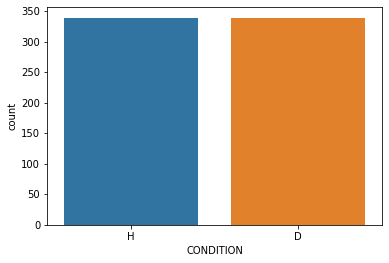

In [13]:
ax = sns.countplot(y, label="Count")      
H, D = y.value_counts()
print('Number of Honest: ', H)
print('Number of Dishonest: ', D)

In [14]:
X.describe()

,PreM1,PreM2,PreM3,PreM4,PreM5,PreM6,C1,C2,C3,C4,C5,C6,IC1,IC2,IC3,IC4,IC5,IC6
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,1.747788,1.283186,1.945428,1.268437,1.318584,1.615044,3.730088,3.449853,3.613569,3.222714,4.147493,3.612094,4.541298,4.305310,4.539823,4.379056,4.584071,4.342183
std,1.319030,0.886155,1.324121,0.843031,0.848307,1.045866,1.279082,1.457317,1.365731,1.472229,1.079725,1.353905,0.826396,1.035415,0.840645,0.886117,0.773173,1.249291
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

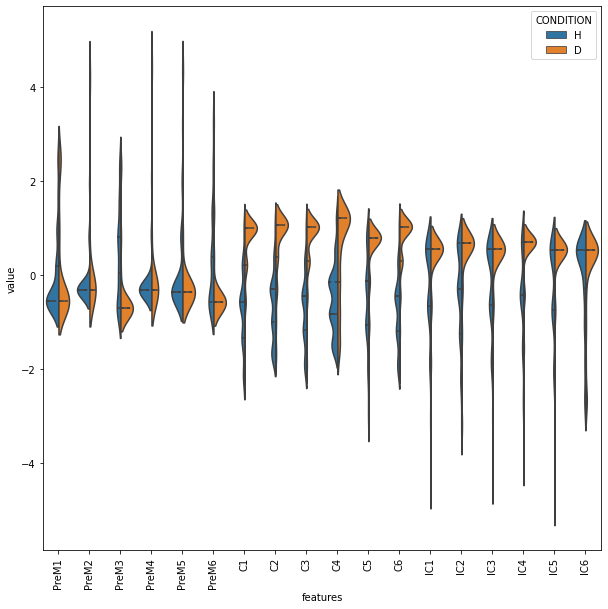

In [17]:
data_dia = y
data1 = X
data_n_2 = (data1 - data1.mean()) / (data1.std()) # standardization
data1 = pd.concat([y,data_n_2.iloc[:,0:len(df)]],axis=1)
data1 = pd.melt(data1,id_vars="CONDITION",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CONDITION", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

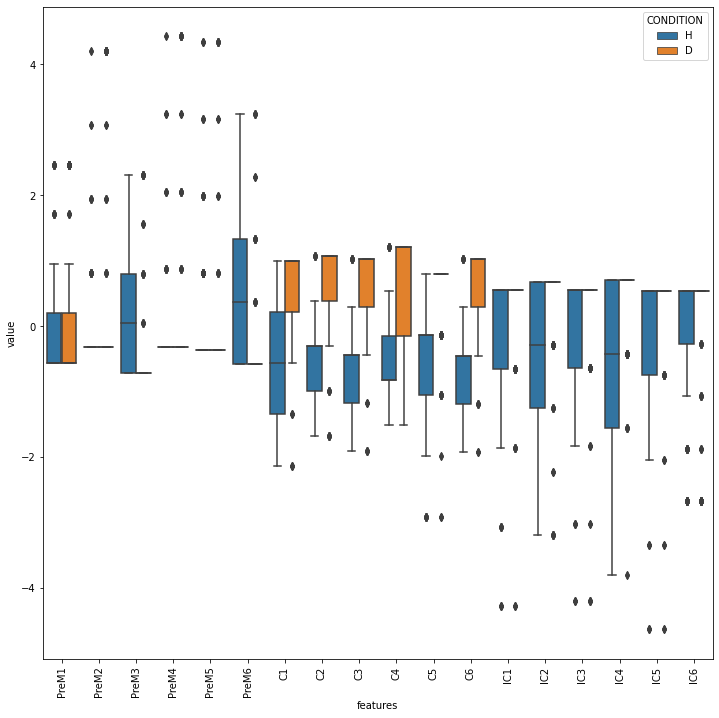

In [18]:
plt.figure(figsize=(12,12))
sns.boxplot(x="features", y="value", hue="CONDITION", data=data1)
plt.xticks(rotation=90)

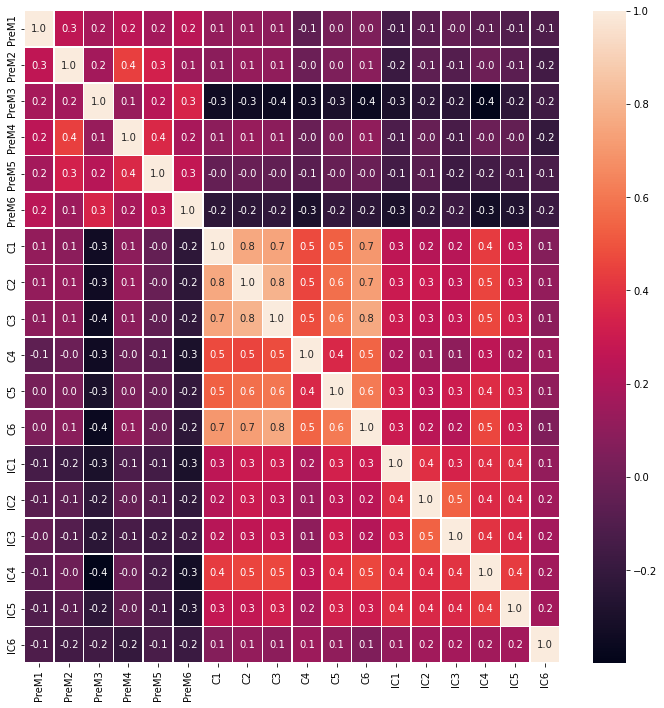

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **RANDOM FOREST**

In [67]:
# Create the RFE object and rank each pixel
clf_rf = RandomForestClassifier()  
clr_rf = clf_rf.fit(X_train,y_train)

rfe = RFE(estimator=clf_rf, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

Accuracy is:  0.9313725490196079


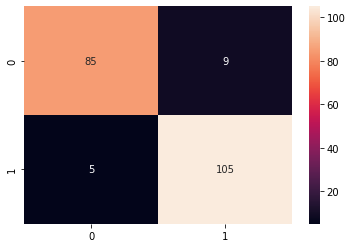

In [68]:
acc_score = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',acc_score)
cm_rf = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm_rf,annot=True,fmt="d")

In [34]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['C1', 'C2', 'C3', 'C4', 'C6'], dtype='object')


In [44]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_2 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 17
Best features : Index(['PreM1', 'PreM2', 'PreM3', 'PreM5', 'PreM6', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6'],
      dtype='object')


In [40]:
#print('Chosen best 5 feature by rfe:',X_train.columns[rfecv.support_])

Chosen best 5 feature by rfe: Index(['PreM1', 'PreM2', 'PreM3', 'PreM6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


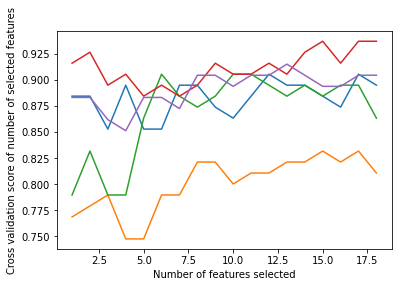

In [45]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# **DECISION TREE** 

In [61]:
# Create the RFE object and rank each pixel

clf_dt = DecisionTreeClassifier()  
clf_dt = clf_dt.fit(X_train,y_train)

rfe_dt = RFE(estimator=clf_dt, n_features_to_select=5, step=1)
rfe_dt = rfe.fit(X_train, y_train)

Accuracy is:  0.8823529411764706


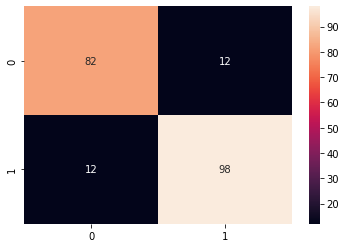

In [62]:
acc_score_dt = accuracy_score(y_test,clf_dt.predict(X_test))
print('Accuracy is: ',acc_score_dt)
cm_dt = confusion_matrix(y_test,clf_dt.predict(X_test))
sns.heatmap(cm_dt,annot=True,fmt="d")

In [63]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe_dt.support_])

Chosen best 5 feature by rfe: Index(['C1', 'C2', 'C3', 'C4', 'C6'], dtype='object')


Recursive feature elimination with cross validation and SVM

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [64]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_dt_2 = DecisionTreeClassifier() 
rfecv_dt = RFECV(estimator=clf_dt_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv_dt = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv_dt.n_features_)
print('Best features :', X_train.columns[rfecv_dt.support_])

Optimal number of features : 17
Best features : Index(['PreM1', 'PreM2', 'PreM3', 'PreM5', 'PreM6', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


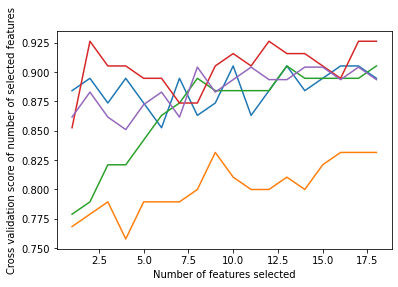

In [65]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_dt.grid_scores_) + 1), rfecv_dt.grid_scores_)
plt.show()

# **SVM MODEL**

In [66]:
clf_svc = svm.SVC(kernel='linear', probability=True, random_state = 42)
clf_svc = clf_svc.fit(X_train,y_train)

rfe_svc = RFE(estimator=clf_dt, n_features_to_select=5, step=1)
rfe_svc = rfe.fit(X_train, y_train)

Accuracy is:  0.9362745098039216


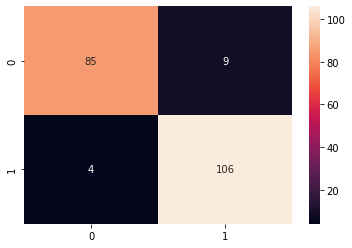

In [70]:
acc_score_svc = accuracy_score(y_test,clf_svc.predict(X_test))
print('Accuracy is: ',acc_score_svc)
cm_svc = confusion_matrix(y_test,clf_svc.predict(X_test))
sns.heatmap(cm_svc,annot=True,fmt="d")

In [71]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe_svc.support_])

Chosen best 5 feature by rfe: Index(['PreM3', 'C1', 'C2', 'C3', 'C6'], dtype='object')


In [72]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_svc_2 = svm.SVC(kernel='linear', probability=True, random_state = 42) 
rfecv_svc = RFECV(estimator=clf_svc_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv_svc = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv_svc.n_features_)
print('Best features :', X_train.columns[rfecv_svc.support_])

Optimal number of features : 18
Best features : Index(['PreM1', 'PreM2', 'PreM3', 'PreM4', 'PreM5', 'PreM6', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


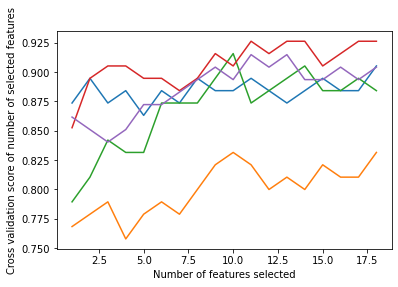

In [73]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_svc.grid_scores_) + 1), rfecv_svc.grid_scores_)
plt.show()